# Trabalhando com Planilhas Excel

In [1]:
import pandas as pd

In [3]:
#importando os arquivo em excel
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [6]:
#Concatenando os arquivos em excel , visto que todos possuem a mesma estrutura
df = pd.concat([df1,df2,df3,df4,df5])

In [7]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [13]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [11]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
100,Fortaleza,2019-01-01,18.58,1003,1
96,Aracaju,2018-01-01,85.92,1521,2
36,Aracaju,2018-01-01,37.99,1523,8
36,Natal,2019-02-09,328.00,853,2
80,Recife,2019-01-01,114.14,982,8


In [12]:
#Alterando o tipo de dados de uma coluna
df["LojaID"] = df["LojaID"].astype("object")

In [17]:
#Verificando valores nulos/faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [16]:
#Substituindo os valores nulos pela média dos demais valores
df["Vendas"].fillna(df["Vendas"].mean(),inplace = True)

In [ ]:
#Substituindo por valores zero
df["Vendas"].fillna(0,inplace = True)

In [ ]:
#Excluindo as linhas
df.dropna(inplace = True)

In [ ]:
#Excluindo as linha com valores nulos com base apenas em 1 coluna
df.dropna(subset=["Vendas"],inplace = True)

In [ ]:
#Excluindo s linha que estejam com valores faltantes em todas as colunas
df.dropna(how="all",inplace = True)

### Criando uma nova coluna

In [18]:
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [19]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [21]:
#Maior receita
df["Receita"].max()

3544.0

In [22]:
#Menor receita
df["Receita"].min()

3.34

In [24]:
#Retorna o top 3 de receita
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [25]:
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


### Trabalhando com Datas

In [ ]:
#Transformando a coluan de data em tipo de data
df["Data"] = pd.to_datetime(df["Data"])

In [26]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [27]:
#Criando a coluna de ano
df["Ano_Venda"] = df["Data"].dt.year

In [32]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018,1,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,1,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018,1,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018,1,1


In [31]:
#Criando a coluna mes e dia
df["mes_venda"],df["dia_venda"] = (df["Data"].dt.month,df["Data"].dt.day)

### VIsualização de Dados

<AxesSubplot:>

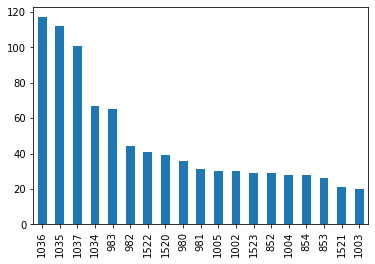

In [34]:
#Plotando grafico de barra
df["LojaID"].value_counts(ascending = False).plot.bar()

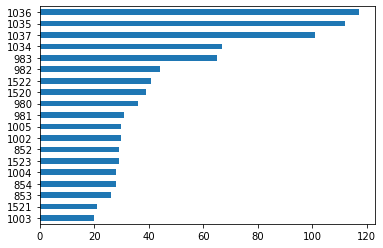

In [37]:
#Plotando grafico de barras horizontais
df["LojaID"].value_counts(ascending = True).plot.barh();

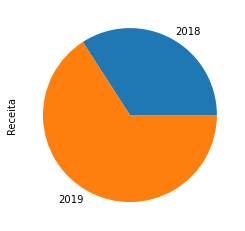

In [38]:
#GRafico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

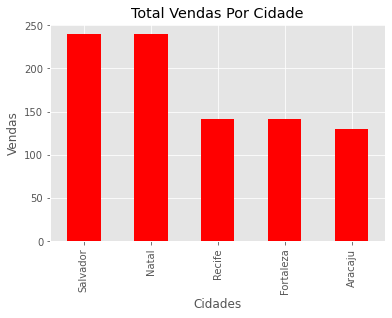

In [44]:
#Adicionando Titulos e nome para os eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title = "Total Vendas Por Cidade",color="red")
plt.xlabel("Cidades")
plt.ylabel("Vendas");

In [42]:
#É possível utilizar outros estilos indo na documentação do matplotlib
plt.style.use('ggplot')

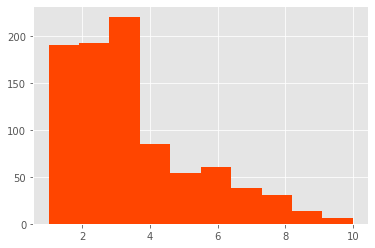

In [48]:
#histograma
plt.hist(df["Qtde"], color = "orangered");

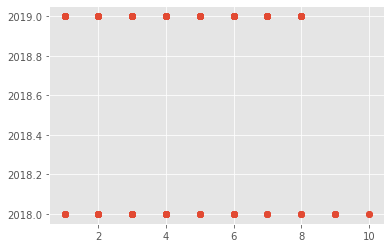

In [50]:
#Grafico de dispersao
plt.scatter(x = df["Qtde"], y =df["Data"].dt.year);

In [ ]:
#Para salvar o graifoc
plt.savefig("imagem.png")